In [1]:
import random as rnd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import collections, functools, operator
import pandas as pd

In [1]:
def smooth_data(l, num):
    """
    Function smoothens the data using the running mean of order given as an argument
    
    Key arguments:
    l - list of integers itended for the smoothening
    num - the argument of running mean for the data
    
    Function returns the list of smoothened data
    """
    numbers_series = pd.Series(l)
    windows = numbers_series.rolling(num)
    moving_averages = windows.mean()
    moving_averages_list = moving_averages.tolist()
    result = moving_averages_list[window_size - 1:] 
    return result

In [165]:
def Bass_diffusion_model(G, potential_innovator_no, potential_imitator_no, prob_p, prob_q, N = 1000):
    """
    Function simulates the Bass diffusion model over 1000 monte-carlo runs with the NN infuence model group, where in the network
    there are 1000 spinsons
    
    Key arguments:
    G -- networkx Graph
    potential_innovator_no -- number of innovators at each timestep
    potential_imitator_no -- number of imitators at each timestep
    prob_p -- probability of buying a product while being an innovator
    prob_q -- threshold of the opinion influence - for imitators if at least this factor of his neighbours have bought
            a product, they would also buy it
    N -- number of monte-carlo runs during the simulation
    
    Function returns the lists of adopters, imitators and innovators that bought the product at each timestep.
    """
    adopters = []
    adopters_inn = []
    adopters_imi = []
    all_nodes = list(G.nodes())
    opinion_dict = {}
    done_all = []
    all_new = []
    for i in range(len(all_nodes)): 
        opinion_dict[i] = 0 
        #dicts.append(opinion_dict)
    for k in range(N):
        done_inn = []
        done_imi = []
        innovators = rnd.sample(all_nodes, min(potential_innovator_no,len(all_nodes)))
        available_nodes = [i for i in all_nodes if i not in innovators]
        imitators = rnd.sample(available_nodes, min(potential_imitator_no, len(available_nodes)))
        for inn in innovators:
            rand2 = rnd.random()
            if rand2 < prob_p and inn not in done_all:
                    opinion_dict[inn] = 1
                    done_inn.append(inn)
        for imi in imitators:
            friends = list(G.neighbors(imi))
            opinions = []
            for y in friends:
                opinions.append(opinion_dict[y])
            try:
                if sum(opinions)/len(opinions) >= prob_q and imi not in done_all:
                    opinion_dict[imi] = 1
                    done_imi.append(imi)
            except:
                pass
        done_all.extend(done_inn)
        done_all.extend(done_imi)
        adopters_inn.append(len(done_inn))
        adopters_imi.append(len(done_imi))
        all_new.append(len(done_inn) + len(done_imi))
        adopters.append(sum(list(opinion_dict.values())))
    return adopters, adopters_inn, adopters_imi, all_new

In [179]:
G = nx.fast_gnp_random_graph(1000,0.005, seed = 2)
N = 1000
MC = 1000
models = []
for i in range(MC):
    models.append(Bass_diffusion_model(G, 20, 16, 0.03, 0.38, N))
    
    

In [182]:
adopters = np.zeros(1000)
adopters_inn = np.zeros(1000)
adopters_imi = np.zeros(1000)
adopters_new = np.zeros(1000)
for i in models:
    for k in range(len(i[0])):
        adopters[k] += i[0][k]/MC
        adopters_inn[k] += i[1][k]/MC
        adopters_imi[k] += i[2][k]/MC
        adopters_new[k] += i[3][k]/MC

In [196]:

adopters_inn_smooth = smooth_data(adopters_inn, 10)
adopters_imi_smooth = smooth_data(adopters_imi, 10)
adopters_new_smooth = smooth_data(adopters_new, 10)


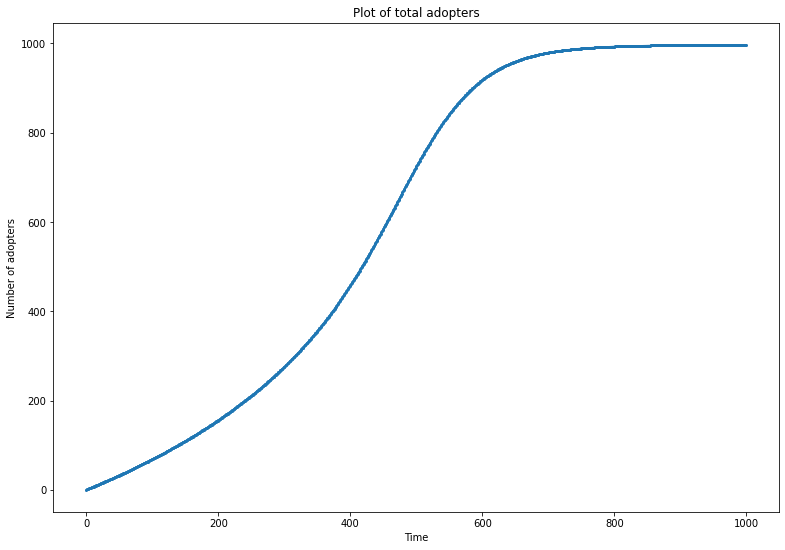

In [198]:
plt.figure(figsize = (13,9))
plt.plot(list(range(N)), adopters, '-o', markersize = 2)
plt.xlabel("Time")
plt.ylabel("Number of adopters")
plt.title("Plot of total adopters")
plt.savefig("Plot of total adopters",dpi = 500)
plt.show()

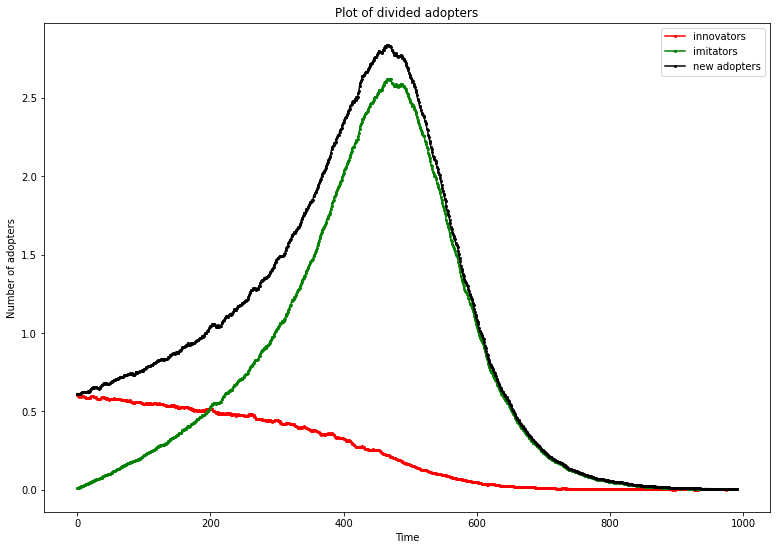

In [199]:
plt.figure(figsize = (13,9))
plt.plot(list(range(len(adopters_inn_smooth))), adopters_inn_smooth, '-o', markersize = 2, color = "red", label = "innovators")
plt.plot(list(range(len(adopters_imi_smooth))), adopters_imi_smooth, '-o', markersize = 2, color = "green", label = "imitators")
plt.plot(list(range(len(adopters_new_smooth))), adopters_new_smooth, '-o', markersize = 2, color = "black", label = "new adopters")
plt.xlabel("Time")
plt.ylabel("Number of adopters")
plt.title("Plot of divided adopters")
plt.legend()
plt.savefig("Plot of divided adopters",dpi = 500)
plt.show()